<a href="https://colab.research.google.com/github/AmilcarArmmand/DSC-Data-Visualization/blob/main/DSC205_Activity_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity 6 - Connor Broderick and Amilcar Armmand

## Exercise 1

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import folium

df = pd.read_csv("https://storage.googleapis.com/scsu-data-science/kc_house_data.csv")
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7      1180.0              0   
1      7242     2.0           0     0  ...      7      2170.0            400   
2     10000     1.0           0     0  ...      6       770.0              0   
3      5000     1.0           0     0  ...      7      1050.0            910   
4      8080     1.0           0     0  ...      8      1680.0              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

### Step 1

Show the price distributions for 2, 3, 4 and 5 bedroom homes, all overlaid in the same figure.  Use displot in Seaborn with the KDE option (see slides 7-8 for an example).    

In [ ]:
df_2to5br = df.loc[(df['bedrooms']<=5) & (df['bedrooms']>=2)]

(0.0, 2500000.0)

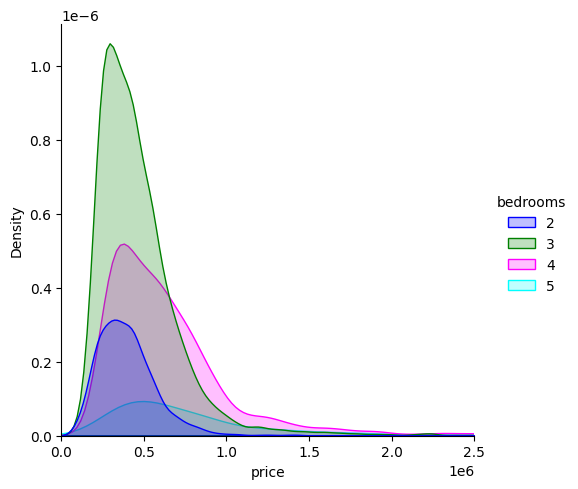

In [ ]:
sns.displot(df_2to5br, x='price', hue='bedrooms',
            palette = {2:'blue', 3:'green', 4:'magenta', 5:'cyan'},
            kind='kde', fill=True)
plt.xlim(0, 2.5e6)

### Step 2

Show the price distribution of homes according  to the following three ranges:

sqft_living < 1500

1500 <= sqft_living <= 3000

sqft_living > 3000


The generated figure should consist of three overlaid distribution plots.  Use displot as in #1.   

In [ ]:
df['sqft_range'] = df['sqft_living']
df.loc[df['sqft_range'] < 1500, ['sqft_range']] = 0
df.loc[(df['sqft_range'] >= 1500) & (df['sqft_range'] <= 3000), ['sqft_range']] = 1
df.loc[df['sqft_range'] > 3000, ['sqft_range']] = 2

(0.0, 2500000.0)

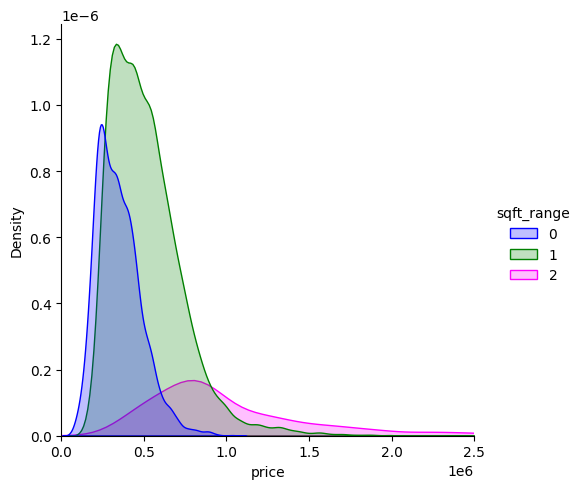

In [ ]:
sns.displot(df, x='price', hue='sqft_range',
            palette = {0:'blue', 1:'green', 2:'magenta'},
            kind='kde', fill=True)
plt.xlim(0, 2.5e6)

### Step 3

Create a map of the houses sold and color code as follows (this will take a few seconds to load):


Lowest quartile (bottom 25%): 	Green circle

Highest quartile (top 25%): 	Blue circle


Use the following initial lat/long values to create the map:
47.64249, -122.2923
Use the quantile function to calculate the quartile cutoff values (quartiles are specific values of the quantiles that split the range into 4 equal parts).  See example here.  


In [ ]:
quartiles = df['price'].quantile([0.25, 0.75])

In [ ]:
quartiles

0.25    321950.0
0.75    645000.0
Name: price, dtype: float64

In [ ]:
q1 = quartiles[0.25]
q4 = quartiles[0.75]

In [ ]:
lat_long = [47.64249, -122.2923]

map = folium.Map(location=lat_long, zoom_start=10)

for index, row in df.iterrows():
  loc = [row['lat'], row['long']]
  if row['price'] < q1:
    c = folium.Circle(radius=10, location = loc, color='green', fill=True)
    c.add_to(map)
  elif row['price'] > q4:
    c = folium.Circle(radius=10, location = loc, color='blue', fill=True)
    c.add_to(map)

map

### Step 4

Create a map with markers for the houses with the 3 highest and 3 lowest selling prices.  The markers should include the sale price.  

In [ ]:
df_sorted = df.sort_values(by='price', ascending=False)

top_3 = df_sorted.head(3)
bottom_3 = df_sorted.tail(3)

map = folium.Map(location=lat_long, zoom_start=10)

for index, row in top_3.iterrows():
    folium.Marker(
        location=[row['lat'], row['long']],
        popup=f'Price: ${row["price"]}',
        icon=folium.Icon(color='green')
    ).add_to(map)

for index, row in bottom_3.iterrows():
    folium.Marker(
        location=[row['lat'], row['long']],
        popup=f'Price: ${row["price"]}',
        icon=folium.Icon(color='red')
    ).add_to(map)

map

## Exercise 2

Consider the NYC vehicle collision dataset discussed in class (full URL below).   Create a map that shows collisions due to the following factors, each plotted using a different color: Unsafe Speed, Traffic Control Disregarded, Aggressive Driving/Road Rage.   

In [ ]:
df = pd.read_csv("https://storage.googleapis.com/scsu-data-science/NYC_collisions.csv")

In [ ]:
df = df.dropna(subset=['latitude', 'longitude', 'contrib_factor'])
display(df)

Unnamed: 0                 date   latitude  longitude  injuries  \
0              0  2017-03-28 00:00:00  40.894600 -73.861206         0   
1              1  2017-03-28 00:00:00  40.654080 -73.977610         0   
2              2  2017-03-28 00:00:00  40.583847 -73.940590         0   
3              3  2017-03-28 00:00:00  40.762770 -73.975590         0   
4              4  2017-03-28 00:00:00  40.713715 -73.731440         0   
...          ...                  ...        ...        ...       ...   
9995        9995  2017-03-12 18:30:00  40.544487 -74.176506         0   
9996        9996  2017-03-12 18:30:00  40.700123 -73.906220         1   
9997        9997  2017-03-12 18:33:00  40.592410 -73.972860         0   
9998        9998  2017-03-12 18:33:00  40.777530 -73.975006         0   
9999        9999  2017-03-12 18:35:00  40.643185 -73.949740         0   

                      contrib_factor  
0     Driver Inattention/Distraction  
1                        Unspecified  
2     Driver Inattention/Distraction  
3                        Unspecified  
4      Failure to Yield Right-of-Way  
...                              ...  
9995           Following Too Closely  
9996                     Unspecified  
9997    Aggressive Driving/Road Rage  
9998  Driver Inattention/Distraction  
9999  Driver Inattention/Distraction  

[9368 rows x 6 columns]

In [ ]:
m = folium.Map(location=[40.5, -73.8], zoom_start=10)

for index, row in df.iterrows():
    loc = [row['latitude'], row['longitude']]
    if row['contrib_factor'] == 'Unsafe Speed':
        c = folium.Circle(radius=12, location=loc, color='green', fill=True)
        c.add_to(m)
    elif row['contrib_factor'] == 'Traffic Control Disregarded':
        c = folium.Circle(radius=12, location=loc, color='blue', fill=True)
        c.add_to(m)
    elif row['contrib_factor'] == 'Aggressive Driving/Road Rage':
        c = folium.Circle(radius=12, location=loc, color='purple', fill=True)
        c.add_to(m)

m

## Exercise 3

You are provided with a csv file containing geospatial information of state capitals at the URL below.  Create a map of the US and add a marker for each capital.  When the user clicks on the marker, the name of the city should be displayed.  

In [ ]:
df = pd.read_csv("https://storage.googleapis.com/scsu-data-science/usa-state-capitals.csv")
df.head()

State  ST  Population      Capital        long        lat
0     Alabama  AL     5024279   Montgomery  -86.300281  32.377845
1      Alaska  AK      733391       Juneau -134.419720  58.301944
2     Arizona  AZ     7151502      Phoenix -112.097002  33.448057
3    Arkansas  AR     3011524  Little Rock  -92.289197  34.746714
4  California  CA    39538223   Sacramento -121.493173  38.576638

In [ ]:
us_map = folium.Map(location=[37.0902, -95.7129], zoom_start=5)

for index, row in df.iterrows():
    m = folium.Marker(location=[df['lat'][index], df['long'][index]],
                  popup=df['Capital'][index],
                  tooltip="Click me!")
    m.add_to(us_map)

us_map